In [1]:
!pip install Pillow --quiet

In [2]:
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
import matplotlib.pyplot as plt


In [3]:
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import base64

def generate_meme(image_url, top_text, bottom_text, font_size=40):
    # Load image from URL or base64 data
    if image_url.startswith("data:image"):
        # Handle base64 encoded image data
        header, encoded = image_url.split(",", 1)
        image_data = base64.b64decode(encoded)
        img = Image.open(BytesIO(image_data)).convert("RGB")
    else:
        # Handle standard image URL
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content)).convert("RGB")
    draw = ImageDraw.Draw(img)

    # Try to load a standard font
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except:
        font = ImageFont.load_default()

    # Get image size
    width, height = img.size

    # Function to draw text with stroke
    def draw_text(text, y):
        text = text.upper()
        # Calculate text size using textbbox
        bbox = draw.textbbox((0, 0), text, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]

        x = (width - text_width) / 2
        draw.text((x, y), text, fill="white", font=font, stroke_width=2, stroke_fill="black")

    draw_text(top_text, 10)  # Draw top text
    draw_text(bottom_text, height - font_size - 10)  # Draw bottom text

    return img

In [5]:
# Input image and texts
image_url = input("Enter image URL: ")
top_text = input("Enter top text: ")
bottom_text = input("Enter bottom text: ")


Enter image URL: https://imgflip.com/s/meme/Distracted-Boyfriend.jpg
Enter top text: vanakam
Enter bottom text: saptacha


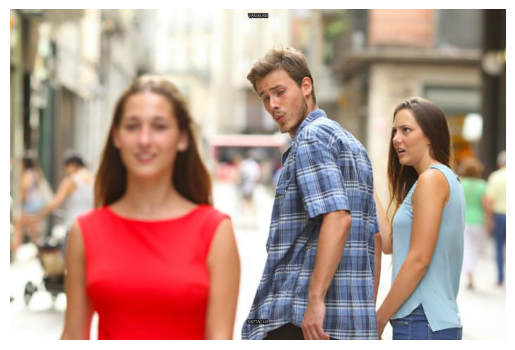

✅ Meme saved as 'generated_meme.jpg'


In [6]:
# Generate meme
meme = generate_meme(image_url, top_text, bottom_text)

# Show meme
plt.imshow(meme)
plt.axis("off")
plt.show()

# Save meme
meme.save("generated_meme.jpg")
print("✅ Meme saved as 'generated_meme.jpg'")


In [ ]:
https://imgflip.com/memetemplates

https://knowyourmeme.com

https://memegenerator.net